<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron
    - Analyze and Compare
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:** A single unit in the network capable of performing the logic required at its level.
- **Input Layer:** inputs/features/columns of our dataset that will be passed to the network.
- **Hidden Layer:** Layers between the input and output layers which apply logic to weights and pass on new weights to the next layer.
- **Output Layer:** The last layer in the network. Apply an activation function to transform it into a format that makes sense for our context,
- **Activation Function:** A function that tranforms output vectors into a relevant form.

###### Explain how back propagation works as if you were explaining it to a five year-old. Use your own words, but feel free to reference external materials for this question. 

After each forward pass through a network, backpropagation performs a backward pass while adjusting the model’s parameters (weights and biases).

###### Remember our Simple Perceptron Class from Monday. In a simple prediction describe the process of making a prediction. How do you go from inputs to predicted output.

1) Establish training data (inputs)

2) Prepare the activation function

3) Initialize weights inputs

4) Calculate weighted sum of inputs and weights

5) Take difference of output and true values to calculate error

6) Gradient descent/backprop - magic!

7) Print out activated_output by activation function

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using Tensorflow Keras. After you build these two models, compare the results of the model.

In [34]:
"""
Our Dataset
"""
import numpy as np

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

In [35]:
X

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ],
       [ 0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567],
       [ 0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252],
       [-0.88778575, -1.98079647],
       [-0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985],
       [-0.38732682, -0.30230275],
       [-1.04855297, -1.42001794],
       [-1.70627019,  1.9507754 ],
       [-0.50965218, -0.4380743 ],
       [-1.25279536,  0.77749036],
       [-1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 ],
       [-0.51080514, -1.18063218],
       [-0.02818223,  0.42833187],
       [ 0.06651722,

In [4]:
y

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

### Simple Perceptron
Construct a simple perceptron using Keras. You model should have 1 dense layer with a single neuron and a sigmoid activation function. Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 

In [5]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [50]:
# Creating a Sequential Model and adding one layer
epochs=150 
batch_size=10

model1 = Sequential()
model1.add(Dense(1, activation='sigmoid', input_shape=(X.shape[1],)))
# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the result
h1 = model1.fit(X,y, epochs=epochs, batch_size=batch_size)

Train on 300 samples
Epoch 1/150
300/300 [==============================] - 0s 778us/sample - loss: 0.8119 - accuracy: 0.5000
Epoch 2/150
300/300 [==============================] - 0s 145us/sample - loss: 0.8056 - accuracy: 0.5000
Epoch 3/150
300/300 [==============================] - 0s 129us/sample - loss: 0.7992 - accuracy: 0.5033
Epoch 4/150
300/300 [==============================] - 0s 138us/sample - loss: 0.7932 - accuracy: 0.4967
Epoch 5/150
300/300 [==============================] - 0s 122us/sample - loss: 0.7875 - accuracy: 0.4867
Epoch 6/150
300/300 [==============================] - 0s 123us/sample - loss: 0.7820 - accuracy: 0.4833
Epoch 7/150
300/300 [==============================] - 0s 145us/sample - loss: 0.7766 - accuracy: 0.4767
Epoch 8/150
300/300 [==============================] - 0s 129us/sample - loss: 0.7712 - accuracy: 0.4767
Epoch 9/150
300/300 [==============================] - 0s 147us/sample - loss: 0.7664 - accuracy: 0.4700
Epoch 10/150
300/300 [============

300/300 [==============================] - 0s 125us/sample - loss: 0.6866 - accuracy: 0.6700
Epoch 79/150
300/300 [==============================] - 0s 119us/sample - loss: 0.6866 - accuracy: 0.6700
Epoch 80/150
300/300 [==============================] - 0s 119us/sample - loss: 0.6866 - accuracy: 0.6733
Epoch 81/150
300/300 [==============================] - 0s 121us/sample - loss: 0.6866 - accuracy: 0.6767
Epoch 82/150
300/300 [==============================] - 0s 129us/sample - loss: 0.6866 - accuracy: 0.6833
Epoch 83/150
300/300 [==============================] - 0s 120us/sample - loss: 0.6865 - accuracy: 0.6867
Epoch 84/150
300/300 [==============================] - 0s 123us/sample - loss: 0.6864 - accuracy: 0.6867
Epoch 85/150
300/300 [==============================] - 0s 126us/sample - loss: 0.6864 - accuracy: 0.6867
Epoch 86/150
300/300 [==============================] - 0s 123us/sample - loss: 0.6864 - accuracy: 0.6867
Epoch 87/150
300/300 [==============================] - 0s 

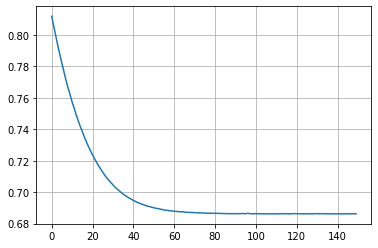

In [51]:
import matplotlib.pyplot as plt
plt.grid(True)
plt.plot(h1.history['loss']);

### Multi-Layer Perceptron
Now construct a multi-layer perceptron using Keras. Here are some architecture suggestions: 
- 2 Hidden Layers
- 5-32 Neurons in the Hidden Layers
- Your pick of activation function and optimizer
- Incorporate the Callback function below into your model

Your model should be called `model2` and make sure to save the results of your fit statement to a variable called `h2`. You must also monitor the metric 'accuracy'.

In [52]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .99999):   
            self.model.stop_training = True

In [56]:
epochs=100
batch_size=10

model2 = Sequential()
model2.add(Dense(32, activation=tf.nn.relu, input_shape=(X.shape[1],))) # 1st hidden layer
model2.add(Dense(16, activation=tf.nn.relu)) # 2nd hidden layer
model2.add(Dense(1)) # output layer


model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


h2 = model2.fit(X,y, epochs=epochs, batch_size=batch_size, callbacks=[myCallback()])

Train on 300 samples
Epoch 1/100
300/300 [==============================] - 0s 985us/sample - loss: 3.2049 - accuracy: 0.6000
Epoch 2/100
300/300 [==============================] - 0s 151us/sample - loss: 1.5014 - accuracy: 0.6800
Epoch 3/100
300/300 [==============================] - 0s 138us/sample - loss: 0.5492 - accuracy: 0.7033
Epoch 4/100
300/300 [==============================] - 0s 138us/sample - loss: 0.4574 - accuracy: 0.7300
Epoch 5/100
300/300 [==============================] - 0s 136us/sample - loss: 0.4074 - accuracy: 0.7467
Epoch 6/100
300/300 [==============================] - 0s 143us/sample - loss: 0.3666 - accuracy: 0.7633
Epoch 7/100
300/300 [==============================] - 0s 151us/sample - loss: 0.3328 - accuracy: 0.7900
Epoch 8/100
300/300 [==============================] - 0s 139us/sample - loss: 0.3033 - accuracy: 0.8167
Epoch 9/100
300/300 [==============================] - 0s 138us/sample - loss: 0.2752 - accuracy: 0.8500
Epoch 10/100
300/300 [============

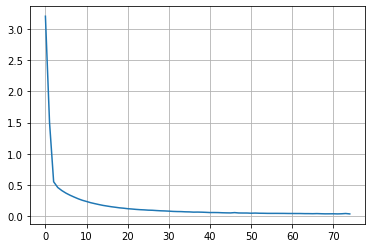

In [57]:
plt.grid(True)
plt.plot(h2.history['loss']);

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. Install the package `mlxtend` into the environment you are using for the sprint challenge.


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [29]:
pip install mlxtend

     |████████████████████████████████| 1.3 MB 991 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


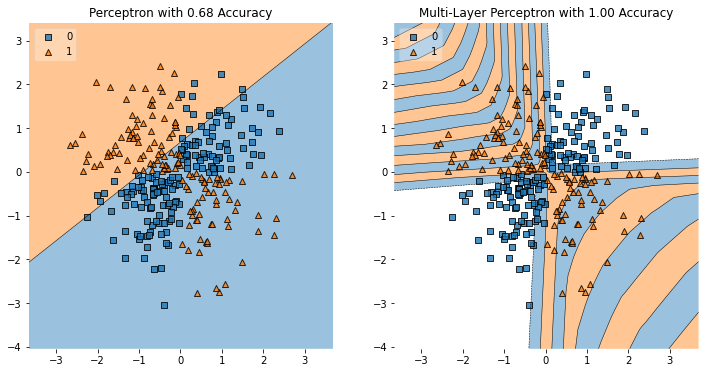

In [58]:
# Do Not change anything in this cell

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

Why does the Perceptron (`model1`) only achieve ~70% accuracy? What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y? 

Why might this property be useful in more complex data such as images?

###### 1) in model 1 there is not much of the parameters it can rely to. (talking about back propagation)

###### 2) model 2 - The model expects rows of data with 2 variables (the input_dim=2 argument) The first hidden layer has 32 nodes and uses the relu activation function. The second hidden layer has 16 nodes and uses the relu activation function. The output layer has one node. That allows backpropagation perform better while adjusting the model’s parameters (weights and biases).

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

###### Load the data

In [59]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3,0
218,65,1,0,135,254,0,0,127,0,2.8,1,1,3,0
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2,1
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3,0


###### Look at the 'target' values

1    165
0    138
Name: target, dtype: int64

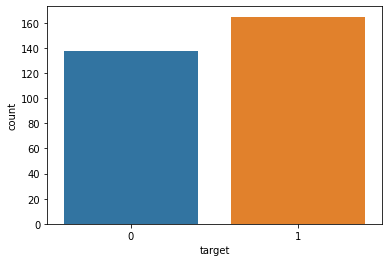

In [63]:
import seaborn as sns
sns.countplot(x='target', data=df);
df['target'].value_counts()

##### Browse through some of the features

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

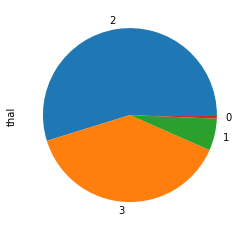

In [64]:
# thalium stress test
df['thal'].value_counts().plot.pie()
plt.gca().set_aspect('equal')
df['thal'].value_counts()

In [83]:
import numpy as np
from sklearn.model_selection import train_test_split

##### Prepare the data (do train test split and scale the data)

In [67]:
# Create Features DataFrame
X = df.drop('target',axis=1)

# Create Target Series
y = df['target']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [68]:
# Scale Data
sc= StandardScaler()

# fit_transform on train
X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=X.columns)

# transform on test
X_test = sc.transform(X_test)

##### Check the result

In [69]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.187683,-1.395726,-0.959550,3.778236,0.742365,2.382534,-1.006947,-0.710806,1.423610,2.575790,-2.238843,1.438291,1.105257
1,-0.031361,-1.395726,0.993974,-1.182520,-0.638615,-0.419721,0.897861,0.360310,-0.702439,0.484136,-0.635634,-0.723908,-0.523920
2,0.844816,-1.395726,-0.959550,1.022261,-0.078758,-0.419721,0.897861,0.188932,1.423610,0.309832,-0.635634,-0.723908,-0.523920
3,0.187683,0.716473,-0.959550,-0.355727,0.014551,2.382534,-1.006947,-0.239515,1.423610,0.135528,-0.635634,0.357191,-0.523920
4,0.406728,-1.395726,1.970736,1.022261,0.649055,2.382534,-1.006947,0.531689,-0.702439,-0.038777,0.967576,-0.723908,-0.523920


In [70]:
X.shape

(303, 13)

###### Train your model and report its baseline accuracy.

In [72]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Important Hyperparameters
inputs = X_train.shape[1]
epochs = 75
batch_size = 10


# Create Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(inputs,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit Model
baseline = model.fit(X_train, y_train, 
          validation_data=(X_test,y_test), 
          epochs=epochs, 
          batch_size=batch_size
         )
baseline

Train on 227 samples, validate on 76 samples
Epoch 1/75
227/227 [==============================] - 0s 2ms/sample - loss: 1.4049 - accuracy: 0.5947 - val_loss: 0.5083 - val_accuracy: 0.7237
Epoch 2/75
227/227 [==============================] - 0s 210us/sample - loss: 0.4833 - accuracy: 0.8062 - val_loss: 0.6863 - val_accuracy: 0.7763
Epoch 3/75
227/227 [==============================] - 0s 239us/sample - loss: 0.4110 - accuracy: 0.8502 - val_loss: 0.8513 - val_accuracy: 0.7895
Epoch 4/75
227/227 [==============================] - 0s 214us/sample - loss: 0.3332 - accuracy: 0.8855 - val_loss: 1.1652 - val_accuracy: 0.7632
Epoch 5/75
227/227 [==============================] - 0s 211us/sample - loss: 0.2839 - accuracy: 0.9207 - val_loss: 1.3250 - val_accuracy: 0.7763
Epoch 6/75
227/227 [==============================] - 0s 209us/sample - loss: 0.2641 - accuracy: 0.9119 - val_loss: 1.3097 - val_accuracy: 0.7763
Epoch 7/75
227/227 [==============================] - 0s 203us/sample - loss: 0.2

227/227 [==============================] - 0s 215us/sample - loss: 0.0685 - accuracy: 0.9956 - val_loss: 2.3889 - val_accuracy: 0.7632
Epoch 57/75
227/227 [==============================] - 0s 210us/sample - loss: 0.0687 - accuracy: 0.9956 - val_loss: 2.4169 - val_accuracy: 0.7500
Epoch 58/75
227/227 [==============================] - 0s 196us/sample - loss: 0.0683 - accuracy: 0.9956 - val_loss: 2.3842 - val_accuracy: 0.7632
Epoch 59/75
227/227 [==============================] - 0s 194us/sample - loss: 0.0677 - accuracy: 0.9956 - val_loss: 2.3781 - val_accuracy: 0.7763
Epoch 60/75
227/227 [==============================] - 0s 193us/sample - loss: 0.0678 - accuracy: 0.9956 - val_loss: 2.3789 - val_accuracy: 0.7763
Epoch 61/75
227/227 [==============================] - 0s 194us/sample - loss: 0.0677 - accuracy: 0.9956 - val_loss: 2.3918 - val_accuracy: 0.7763
Epoch 62/75
227/227 [==============================] - 0s 204us/sample - loss: 0.0679 - accuracy: 0.9956 - val_loss: 2.3868 - val_

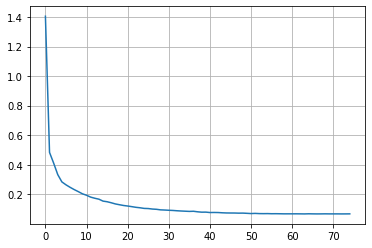

In [75]:
plt.grid(True)
plt.plot(baseline.history['loss']);

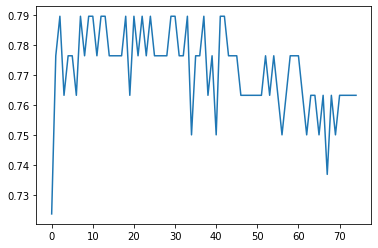

In [81]:
plt.plot(baseline.history['val_accuracy']);

##### Hyperparameter tune at least two parameters and report your model's accuracy. 

In [96]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


# fix random seed for reproducibility
seed = 7
np.random.seed(seed)


# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=13, activation='relu'))
    model.add(Dense(12, activation='softmax'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)


# define the grid search parameters
param_grid = {'batch_size': [10, 20, 40],
              'epochs': [20, 40, 60]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_train, y_train)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.8587439775466919 using {'batch_size': 20, 'epochs': 60}
Means: 0.8365217566490173, Stdev: 0.04688589977408447 with: {'batch_size': 10, 'epochs': 20}
Means: 0.8414492726325988, Stdev: 0.007792022924585056 with: {'batch_size': 10, 'epochs': 40}
Means: 0.8057971000671387, Stdev: 0.03954983168459657 with: {'batch_size': 10, 'epochs': 60}
Means: 0.8100483059883118, Stdev: 0.0692655753927442 with: {'batch_size': 20, 'epochs': 20}
Means: 0.8322705268859864, Stdev: 0.03450558887002656 with: {'batch_size': 20, 'epochs': 40}
Means: 0.8587439775466919, Stdev: 0.03417150218739915 with: {'batch_size': 20, 'epochs': 60}
Means: 0.8104347825050354, Stdev: 0.0590539659201993 with: {'batch_size': 40, 'epochs': 20}
Means: 0.8455072522163392, Stdev: 0.047363100541472636 with: {'batch_size': 40, 'epochs': 40}
Means: 0.8277294754981994, Stdev: 0.052327203151835096 with: {'batch_size': 40, 'epochs': 60}


###### Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
###### 2nd tuning batch size and epochs

In [104]:
# define the grid search parameters
param_grid = {'batch_size': [10, 20, 40, 60, 80, 100],
              'epochs': [20, 40, 60, 200]}

# Create Grid Search
grid2 = GridSearchCV(grid_result.best_estimator_, param_grid=param_grid, n_jobs=1)
grid_result2 = grid2.fit(X_train, y_train)

# Report Results
print(f"Best: {grid_result2.best_score_} using {grid_result2.best_params_}")
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.8588405847549438 using {'batch_size': 10, 'epochs': 20}
Means: 0.8588405847549438, Stdev: 0.03388591834001053 with: {'batch_size': 10, 'epochs': 20}
Means: 0.8189372062683106, Stdev: 0.04648879320332556 with: {'batch_size': 10, 'epochs': 40}
Means: 0.845700490474701, Stdev: 0.031604106823157854 with: {'batch_size': 10, 'epochs': 60}
Means: 0.8278260946273803, Stdev: 0.07126060701342468 with: {'batch_size': 10, 'epochs': 200}
Means: 0.8237681150436401, Stdev: 0.028172823613911983 with: {'batch_size': 20, 'epochs': 20}
Means: 0.841256034374237, Stdev: 0.026663154881893282 with: {'batch_size': 20, 'epochs': 40}
Means: 0.841256034374237, Stdev: 0.017772510991860276 with: {'batch_size': 20, 'epochs': 60}
Means: 0.841352665424347, Stdev: 0.04049750814927614 with: {'batch_size': 20, 'epochs': 200}
Means: 0.6833816528320312, Stdev: 0.1213188044682131 with: {'batch_size': 40, 'epochs': 20}
Means: 0.8454106450080872, Stdev: 0.03834057691575126 with: {'batch_size': 40, 'epochs': 40}
Means

###### 3rd tuning with optimizer

In [107]:
params = {'optimizer': ['adam', 'nadam', 'adamax'],
          'epochs': [10, 20, 40, 60, 80, 100],
          'batch_size': [20, 40, 60, 200]}
grid3 = GridSearchCV(estimator=grid_result2.best_estimator_, param_grid=params, n_jobs=-1)
grid_result3 = grid3.fit(X_train, y_train)

print(f'Best: {grid_result3.best_score_} using {grid_result3.best_params_}')
means = grid_result3.cv_results_['mean_test_score']
stds = grid_result3.cv_results_['std_test_score']
params = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'Mean: {mean}, Stdev: {stdev} with : {param}')

Best: 0.8678260922431946 using {'batch_size': 20, 'epochs': 100, 'optimizer': 'adam'}
Mean: 0.7311111211776733, Stdev: 0.0712370166884302 with : {'batch_size': 20, 'epochs': 10, 'optimizer': 'adam'}
Mean: 0.7142029166221618, Stdev: 0.06431807396755286 with : {'batch_size': 20, 'epochs': 10, 'optimizer': 'nadam'}
Mean: 0.6306280255317688, Stdev: 0.11085355992007237 with : {'batch_size': 20, 'epochs': 10, 'optimizer': 'adamax'}
Mean: 0.8062801957130432, Stdev: 0.020491297623690213 with : {'batch_size': 20, 'epochs': 20, 'optimizer': 'adam'}
Mean: 0.8019323706626892, Stdev: 0.060533539201169814 with : {'batch_size': 20, 'epochs': 20, 'optimizer': 'nadam'}
Mean: 0.5772946953773499, Stdev: 0.13809532355597864 with : {'batch_size': 20, 'epochs': 20, 'optimizer': 'adamax'}
Mean: 0.8369082093238831, Stdev: 0.027007544933674733 with : {'batch_size': 20, 'epochs': 40, 'optimizer': 'adam'}
Mean: 0.8369082093238831, Stdev: 0.03898116014108007 with : {'batch_size': 20, 'epochs': 40, 'optimizer': 'n

In [108]:
grid_result3.best_score_

0.8678260922431946

In [113]:
pred = grid_result3.best_estimator_.predict(X_test)

In [121]:
print('Predicted result:', pred[1])
print('\n')
print('Actual result:', df['target'][1])

Predicted result: [1]


Actual result: 1
